In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [2]:
sc._settings.ScanpyConfig.n_jobs = -1

In [3]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [7]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tonsil_codex/quantification/Tonsil_Clustering16_K46.csv')

In [11]:
df.columns

Index(['ClusterID', 'EventID', 'File Name', 'Index in File', 'Event Name',
       'Comment', 'Cyc_2_ch_4 (CD56):Cyc_2_ch_4 (CD56)',
       'Cyc_3_ch_3 (FoxP3):Cyc_3_ch_3 (FoxP3)',
       'Cyc_3_ch_4 (CD21):Cyc_3_ch_4 (CD21)',
       'Cyc_4_ch_2 (MUC1):Cyc_4_ch_2 (MUC1)',
       'Cyc_4_ch_4 (PD1):Cyc_4_ch_4 (PD1)',
       'Cyc_5_ch_2 (CD11b):Cyc_5_ch_2 (CD11b)',
       'Cyc_5_ch_3 (CD4):Cyc_5_ch_3 (CD4)',
       'Cyc_5_ch_4 (Ki67):Cyc_5_ch_4 (Ki67)',
       'Cyc_6_ch_2 (CD31):Cyc_6_ch_2 (CD31)',
       'Cyc_6_ch_3 (CD25):Cyc_6_ch_3 (CD25)',
       'Cyc_7_ch_2 (CD15):Cyc_7_ch_2 (CD15)',
       'Cyc_7_ch_3 (CD20):Cyc_7_ch_3 (CD20)',
       'Cyc_7_ch_4 (Annexin A1):Cyc_7_ch_4 (Annexin A1)',
       'Cyc_8_ch_2 (aSMA):Cyc_8_ch_2 (aSMA)',
       'Cyc_8_ch_3 (CD11c):Cyc_8_ch_3 (CD11c)',
       'Cyc_8_ch_4 (Nestin):Cyc_8_ch_4 (Nestin)',
       'Cyc_9_ch_4 (IDO):Cyc_9_ch_4 (IDO)',
       'Cyc_10_ch_2 (Cytokeratin):Cyc_10_ch_2 (Cytokeratin)',
       'Cyc_11_ch_2 (Vimentin):Cyc_11_ch_2 (Vimentin)'

In [11]:
df

,ClusterID,EventID,File Name,Index in File,Event Name,Comment,Cyc_2_ch_4 (CD56):Cyc_2_ch_4 (CD56),Cyc_3_ch_3 (FoxP3):Cyc_3_ch_3 (FoxP3),Cyc_3_ch_4 (CD21):Cyc_3_ch_4 (CD21),Cyc_4_ch_2 (MUC1):Cyc_4_ch_2 (MUC1),...,Cyc_22_ch_3 (CD138):Cyc_22_ch_3 (CD138),Cyc_22_ch_4 (Arginase1):Cyc_22_ch_4 (Arginase1),Cyc_23_ch_3 (CD73):Cyc_23_ch_3 (CD73),Cyc_23_ch_4 (CD206):Cyc_23_ch_4 (CD206),Cyc_24_ch_4 (COX2):Cyc_24_ch_4 (COX2),Cyc_25_ch_3 (MMP9):Cyc_25_ch_3 (MMP9),X (X):X (X),Y (Y):Y (Y),Cyc_2_ch_3 (PDL1):Cyc_2_ch_3 (PDL1),Cyc_10_ch_3 (p53):Cyc_10_ch_3 (p53)
0,2412,7,reg001_Compensated_Z planes,7,7,NaN,208.876328,0.002347,0.000348,-0.000597,...,0.000497,271.666809,261.453430,430.244415,56.049427,-0.000393,3.0,288.0,150.706512,235.618027
1,2412,9,reg001_Compensated_Z planes,9,9,NaN,524.119873,-0.000855,41.845718,-0.001695,...,-0.000725,0.000634,1684.988281,-0.000210,-0.000051,0.001196,0.0,357.0,0.000000,0.000000
2,2412,12,reg001_Compensated_Z planes,12,12,NaN,26.963015,0.000171,284.727112,0.001427,...,0.000697,310.491180,0.000323,343.787781,36.308777,0.000140,0.0,432.0,0.000000,0.000000
3,2412,15,reg001_Compensated_Z planes,15,15,NaN,36.401138,0.000741,98.835175,-0.000244,...,-0.001205,187.544769,-0.000955,0.000148,11.342896,0.000986,0.0,478.0,0.000000,0.000000
4,2412,17,reg001_Compensated_Z planes,17,17,NaN,86.979965,-0.000445,45.013542,-0.000433,...,-0.000173,1435.536377,100.552376,0.000222,57.033249,-0.003303,8.0,205.0,25.728107,1414.393311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192136,2411,189554,reg001_Compensated_Z planes,189554,189554,NaN,40.152611,47.931438,17.212811,-0.000335,...,2224.124756,326.563416,34.339680,21.057241,3.528456,-0.000024,8241.0,8717.0,9.308771,517.572205
192137,2411,189774,reg001_Compensated_Z planes,189774,189774,NaN,48.244949,37.412468,78.798241,0.000469,...,2648.451660,285.523376,605.438293,-0.002113,-0.000270,0.000380,8346.0,8725.0,1.751482,122.228798
192138,2411,189841,reg001_Compensated_Z planes,189841,189841,NaN,87.241386,0.001993,58.722137,0.001389,...,12306.027344,124.276443,-0.000953,19.467058,9.813731,0.000203,8366.0,8753.0,28.070789,465.384125
192139,2411,191648,reg001_Compensated_Z planes,191648,191648,NaN,-0.000743,0.001141,11.906028,0.743147,...,876.605042,212.519852,-0.000165,31.529659,44.842205,-0.000446,9173.0,8903.0,50.254959,449.274750


In [8]:
df.drop(columns=['EventID', 'File Name', 'Index in File', 'Event Name', 'Comment'],inplace=True)
df = reorder_columns(df, 'ClusterID', 'Cyc_10_ch_3 (p53):Cyc_10_ch_3 (p53)')
df.rename(columns={'ClusterID':'cell_type', 'X (X):X (X)': 'x', 'Y (Y):Y (Y)': 'y'}, inplace=True)
df = reorder_columns(df, 'y', 'Cyc_10_ch_3 (p53):Cyc_10_ch_3 (p53)')
df = reorder_columns(df, 'x', 'Cyc_10_ch_3 (p53):Cyc_10_ch_3 (p53)')

In [9]:
df

,Cyc_2_ch_4 (CD56):Cyc_2_ch_4 (CD56),Cyc_3_ch_3 (FoxP3):Cyc_3_ch_3 (FoxP3),Cyc_3_ch_4 (CD21):Cyc_3_ch_4 (CD21),Cyc_4_ch_2 (MUC1):Cyc_4_ch_2 (MUC1),Cyc_4_ch_4 (PD1):Cyc_4_ch_4 (PD1),Cyc_5_ch_2 (CD11b):Cyc_5_ch_2 (CD11b),Cyc_5_ch_3 (CD4):Cyc_5_ch_3 (CD4),Cyc_5_ch_4 (Ki67):Cyc_5_ch_4 (Ki67),Cyc_6_ch_2 (CD31):Cyc_6_ch_2 (CD31),Cyc_6_ch_3 (CD25):Cyc_6_ch_3 (CD25),...,Cyc_22_ch_4 (Arginase1):Cyc_22_ch_4 (Arginase1),Cyc_23_ch_3 (CD73):Cyc_23_ch_3 (CD73),Cyc_23_ch_4 (CD206):Cyc_23_ch_4 (CD206),Cyc_24_ch_4 (COX2):Cyc_24_ch_4 (COX2),Cyc_25_ch_3 (MMP9):Cyc_25_ch_3 (MMP9),Cyc_2_ch_3 (PDL1):Cyc_2_ch_3 (PDL1),Cyc_10_ch_3 (p53):Cyc_10_ch_3 (p53),x,y,cell_type
0,208.876328,0.002347,0.000348,-0.000597,109.997444,-0.000319,2040.207642,0.000125,0.001465,1095.712524,...,271.666809,261.453430,430.244415,56.049427,-0.000393,150.706512,235.618027,3.0,288.0,2412
1,524.119873,-0.000855,41.845718,-0.001695,3.927116,0.001361,0.001188,-0.000615,-0.001230,0.001155,...,0.000634,1684.988281,-0.000210,-0.000051,0.001196,0.000000,0.000000,0.0,357.0,2412
2,26.963015,0.000171,284.727112,0.001427,67.883049,0.001233,534.934937,4.743119,-0.001381,863.431091,...,310.491180,0.000323,343.787781,36.308777,0.000140,0.000000,0.000000,0.0,432.0,2412
3,36.401138,0.000741,98.835175,-0.000244,131.077255,-0.001832,3373.161133,0.000961,8.989543,2700.225586,...,187.544769,-0.000955,0.000148,11.342896,0.000986,0.000000,0.000000,0.0,478.0,2412
4,86.979965,-0.000445,45.013542,-0.000433,148.803238,0.000508,-0.000942,9128.305664,0.000914,-0.000727,...,1435.536377,100.552376,0.000222,57.033249,-0.003303,25.728107,1414.393311,8.0,205.0,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192136,40.152611,47.931438,17.212811,-0.000335,104.920158,-0.000489,163.879898,0.001944,830.455627,546.347900,...,326.563416,34.339680,21.057241,3.528456,-0.000024,9.308771,517.572205,8241.0,8717.0,2411
192137,48.244949,37.412468,78.798241,0.000469,73.301559,0.001707,269.039093,244.732117,11.350822,1367.789551,...,285.523376,605.438293,-0.002113,-0.000270,0.000380,1.751482,122.228798,8346.0,8725.0,2411
192138,87.241386,0.001993,58.722137,0.001389,83.704811,0.836640,899.525391,57.400299,53.744873,3413.613281,...,124.276443,-0.000953,19.467058,9.813731,0.000203,28.070789,465.384125,8366.0,8753.0,2411
192139,-0.000743,0.001141,11.906028,0.743147,39.274033,0.000524,-0.000021,91.529411,100.427124,11.654860,...,212.519852,-0.000165,31.529659,44.842205,-0.000446,50.254959,449.274750,9173.0,8903.0,2411


In [10]:
df.columns = [col.split('(')[-1].split(')')[0] if '(' in col else col for col in df.columns]
df

,CD56,FoxP3,CD21,MUC1,PD1,CD11b,CD4,Ki67,CD31,CD25,...,Arginase1,CD73,CD206,COX2,MMP9,PDL1,p53,x,y,cell_type
0,208.876328,0.002347,0.000348,-0.000597,109.997444,-0.000319,2040.207642,0.000125,0.001465,1095.712524,...,271.666809,261.453430,430.244415,56.049427,-0.000393,150.706512,235.618027,3.0,288.0,2412
1,524.119873,-0.000855,41.845718,-0.001695,3.927116,0.001361,0.001188,-0.000615,-0.001230,0.001155,...,0.000634,1684.988281,-0.000210,-0.000051,0.001196,0.000000,0.000000,0.0,357.0,2412
2,26.963015,0.000171,284.727112,0.001427,67.883049,0.001233,534.934937,4.743119,-0.001381,863.431091,...,310.491180,0.000323,343.787781,36.308777,0.000140,0.000000,0.000000,0.0,432.0,2412
3,36.401138,0.000741,98.835175,-0.000244,131.077255,-0.001832,3373.161133,0.000961,8.989543,2700.225586,...,187.544769,-0.000955,0.000148,11.342896,0.000986,0.000000,0.000000,0.0,478.0,2412
4,86.979965,-0.000445,45.013542,-0.000433,148.803238,0.000508,-0.000942,9128.305664,0.000914,-0.000727,...,1435.536377,100.552376,0.000222,57.033249,-0.003303,25.728107,1414.393311,8.0,205.0,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192136,40.152611,47.931438,17.212811,-0.000335,104.920158,-0.000489,163.879898,0.001944,830.455627,546.347900,...,326.563416,34.339680,21.057241,3.528456,-0.000024,9.308771,517.572205,8241.0,8717.0,2411
192137,48.244949,37.412468,78.798241,0.000469,73.301559,0.001707,269.039093,244.732117,11.350822,1367.789551,...,285.523376,605.438293,-0.002113,-0.000270,0.000380,1.751482,122.228798,8346.0,8725.0,2411
192138,87.241386,0.001993,58.722137,0.001389,83.704811,0.836640,899.525391,57.400299,53.744873,3413.613281,...,124.276443,-0.000953,19.467058,9.813731,0.000203,28.070789,465.384125,8366.0,8753.0,2411
192139,-0.000743,0.001141,11.906028,0.743147,39.274033,0.000524,-0.000021,91.529411,100.427124,11.654860,...,212.519852,-0.000165,31.529659,44.842205,-0.000446,50.254959,449.274750,9173.0,8903.0,2411


In [57]:
X_columns = df.columns[:df.columns.get_loc('cell_type')]
obs_columns = df.columns[df.columns.get_loc('cell_type'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [31]:
adata.X.max()

64760.34375

In [58]:
adata.raw = adata
adata.X = np.arcsinh(adata.X/150)
adata.layers['zscore'] = z_score_normalization(adata.X)

In [22]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

KeyboardInterrupt: 

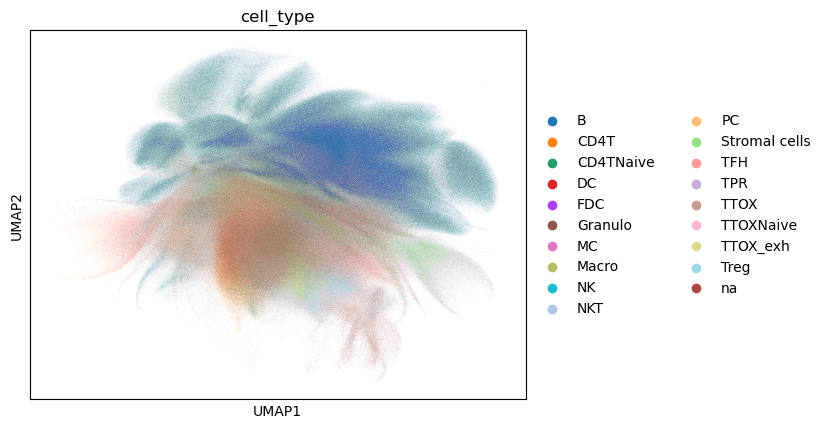

In [18]:
sc.pl.umap(adata, color='cell_type')

In [59]:
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')

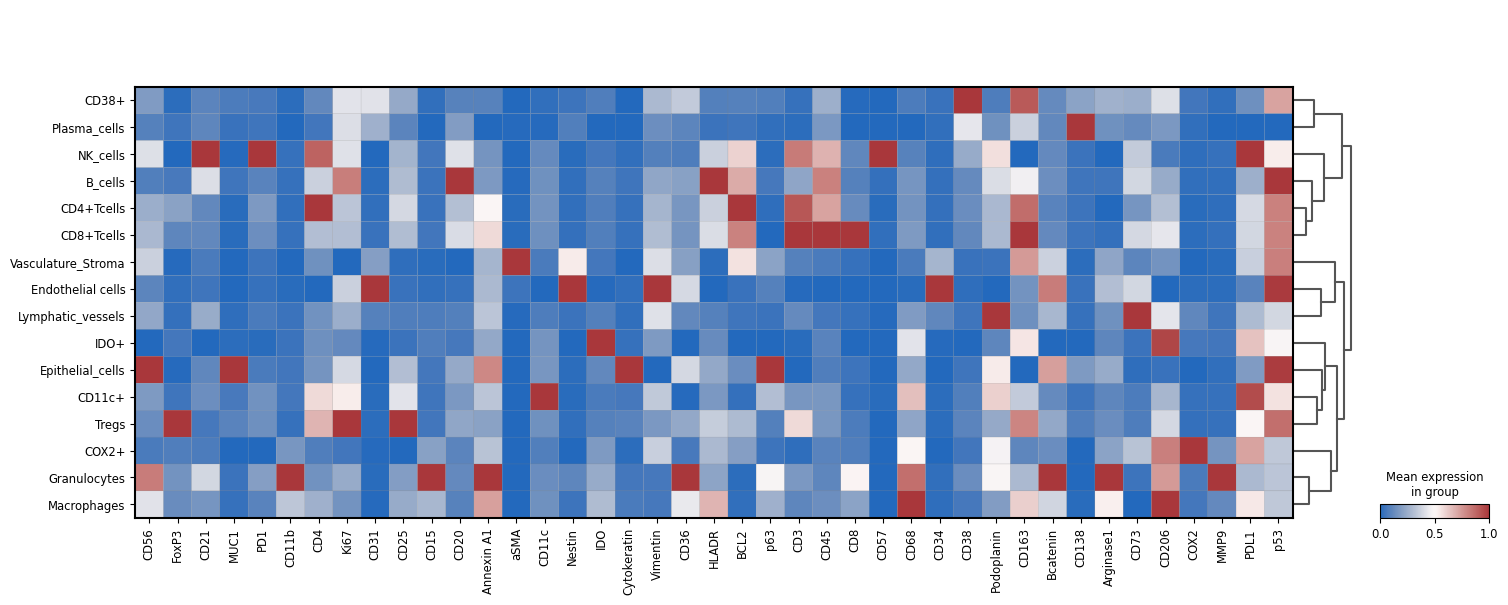

In [60]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

In [11]:
map_dict = {
    '2411': 'Plasma_cells',
    '2421': 'CD38+',
    '2424': 'NK_cells',
    '2412': 'B_cells',
    '2416': 'CD4+Tcells',
    '2419': 'CD8+Tcells',
    '2423': 'Vasculature_Stroma',
    '2417': 'Endothelial cells',
    '2426': 'Lymphatic_vessels',
    '2418': 'IDO+',
    '2425': 'Epithelial_cells',
    '2414': 'Tregs',
    '2415': 'CD11c+',
    '2422': 'COX2+',
    '2413': 'Macrophages',
    '2420': 'Granulocytes'}

2424 propably also has some FDCs in there

In [12]:
df['cell_type'] = df['cell_type'].astype(str)

In [13]:
df['cell_type'] = df['cell_type'].map(map_dict)

In [14]:
df.isna().sum().sum()

0

In [15]:

df.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/tonsil_codex/quantification/processed/Tonsil_Clustering16_K46_cleaned.csv', index=False)